    Summary: 
    2019 Horse derby race data. Using this data, I am able to create an analysis and produce models that help myself 
    and others understand what attributes that are associated with the horse derby races may correlate or possibly 
    predict the outcome of the race. Using my python knowledge and machine learning concepts, I am able to ingest
    this data, clean it, visualize it, and produce conclusions using varying tools. 
    
    Goal: 
    The basic idea behind this whole project is to develop a better understanding to different 
    strageties related to the overall competition.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy as sp
import scipy.stats as stats
import copy
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn import svm 
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

    Importing all necessary or useful packages

    Data is obtained from the kaggle website through the Big Data Derby 2022 analytics competition. 
    URL: https://www.kaggle.com/competitions/big-data-derby-2022/dataUploading 
    Using the nyra_2019_complete.csv, that is the complete 2019 derby data, that contains all three tables.

In [2]:
df = pd.read_csv('nyra_2019_complete.csv')

    Reviewing dataframe of 2019 Derby data

In [3]:
print(df,df.describe(),df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822337 entries, 0 to 822336
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AQU                      822337 non-null  object 
 1   2019-01-01               822337 non-null  object 
 2   9                        822337 non-null  int64  
 3   6                        822337 non-null  object 
 4   72                       822337 non-null  int64  
 5   40.6729017197787         822337 non-null  float64
 6   -73.8276065972899        822337 non-null  float64
 7   600                      822336 non-null  float64
 8   D                        822336 non-null  object 
 9   GD                       822336 non-null  object 
 10  48                       822336 non-null  float64
 11  CLM                      822336 non-null  object 
 12  25000.00                 822336 non-null  float64
 13  00420                    822336 non-null  float64
 14  120 

    Changing names of columns back to original labels. When data was uploaded as you can see above,
    the column names were different numbers but unclear to what each column and associated rows represented.
    Adjusted the columns to name the proper feature. 

In [4]:
columns=['track_id',
'race_date',
'race_number',
'program_number',
'trakus_index',
'latitude',
'longitude',
'distance_id',
'course_type',
'track_condition',
'run_up_distance',
'race_type',
'purse($)',
'post_time',
'weight_carried',
'jockey',
'odds',
'position_at_finish']
df = pd.read_csv('nyra_2019_complete.csv',names=columns)

    Identifying all types of null or NA values

In [5]:
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
nulldemo = pd.DataFrame(a)
nulldemo

,0
0,NaN
1,None
2,[]
3,{}
4,NaN
5,Null
6,NULL
7,None
8,NA
9,?


    Counting all null values in dataframe

In [6]:
for attr in df.columns:
    string_null = np.array([x in a[2:] for x in df[attr]])
    print(attr, df[attr].isnull().sum(), string_null.sum()) 

track_id 0 0
race_date 0 0
race_number 0 0
program_number 0 0
trakus_index 0 0
latitude 0 0
longitude 0 0
distance_id 1 0
course_type 1 0
track_condition 1 0
run_up_distance 1 0
race_type 1 0
purse($) 1 0
post_time 1 0
weight_carried 1 0
jockey 1 0
odds 1 0
position_at_finish 1 0


    Identifying location of null values in form of histogram

(array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.]), array([   0,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
        550,  600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050,
       1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500]), <a list of 30 Patch objects>)


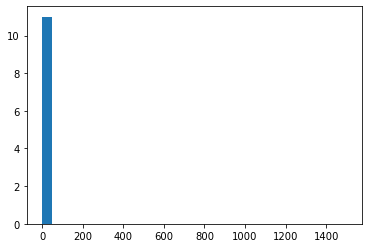

In [7]:
null_counts=df.isnull().sum()
null_counts=null_counts[null_counts>0]
histogram=plt.hist(null_counts,bins=range(0,1550,50))
print(histogram)

    Dropping all null values from dataframe. Based on above code, was able to figure out
    what features and rows had null or na values. Once found I am able to remove them below.
    This is necessary to make sure I get the most accurate and precise outcomes later on.

In [8]:
for c in df.columns:
    print(c, df[c].isnull().sum())
    df=df.dropna()

track_id 0
race_date 0
race_number 0
program_number 0
trakus_index 0
latitude 0
longitude 0
distance_id 0
course_type 0
track_condition 0
run_up_distance 0
race_type 0
purse($) 0
post_time 0
weight_carried 0
jockey 0
odds 0
position_at_finish 0


    Updating dataframe to include every other row, I am only using this selected dataframe for the pairplots,
    due to the large size of the orginial dataframe. It causes major loading time and with every other row,
    should still have an accurate representation of the data.

In [9]:
df2 = df[df.index % 2 == 0]

    Creating pairplots of data using df2, allows for a basic visual understanding of the correalted features
    based on points plotted and can see which plots show a more linear assocaiteds pattern and which plots do not.

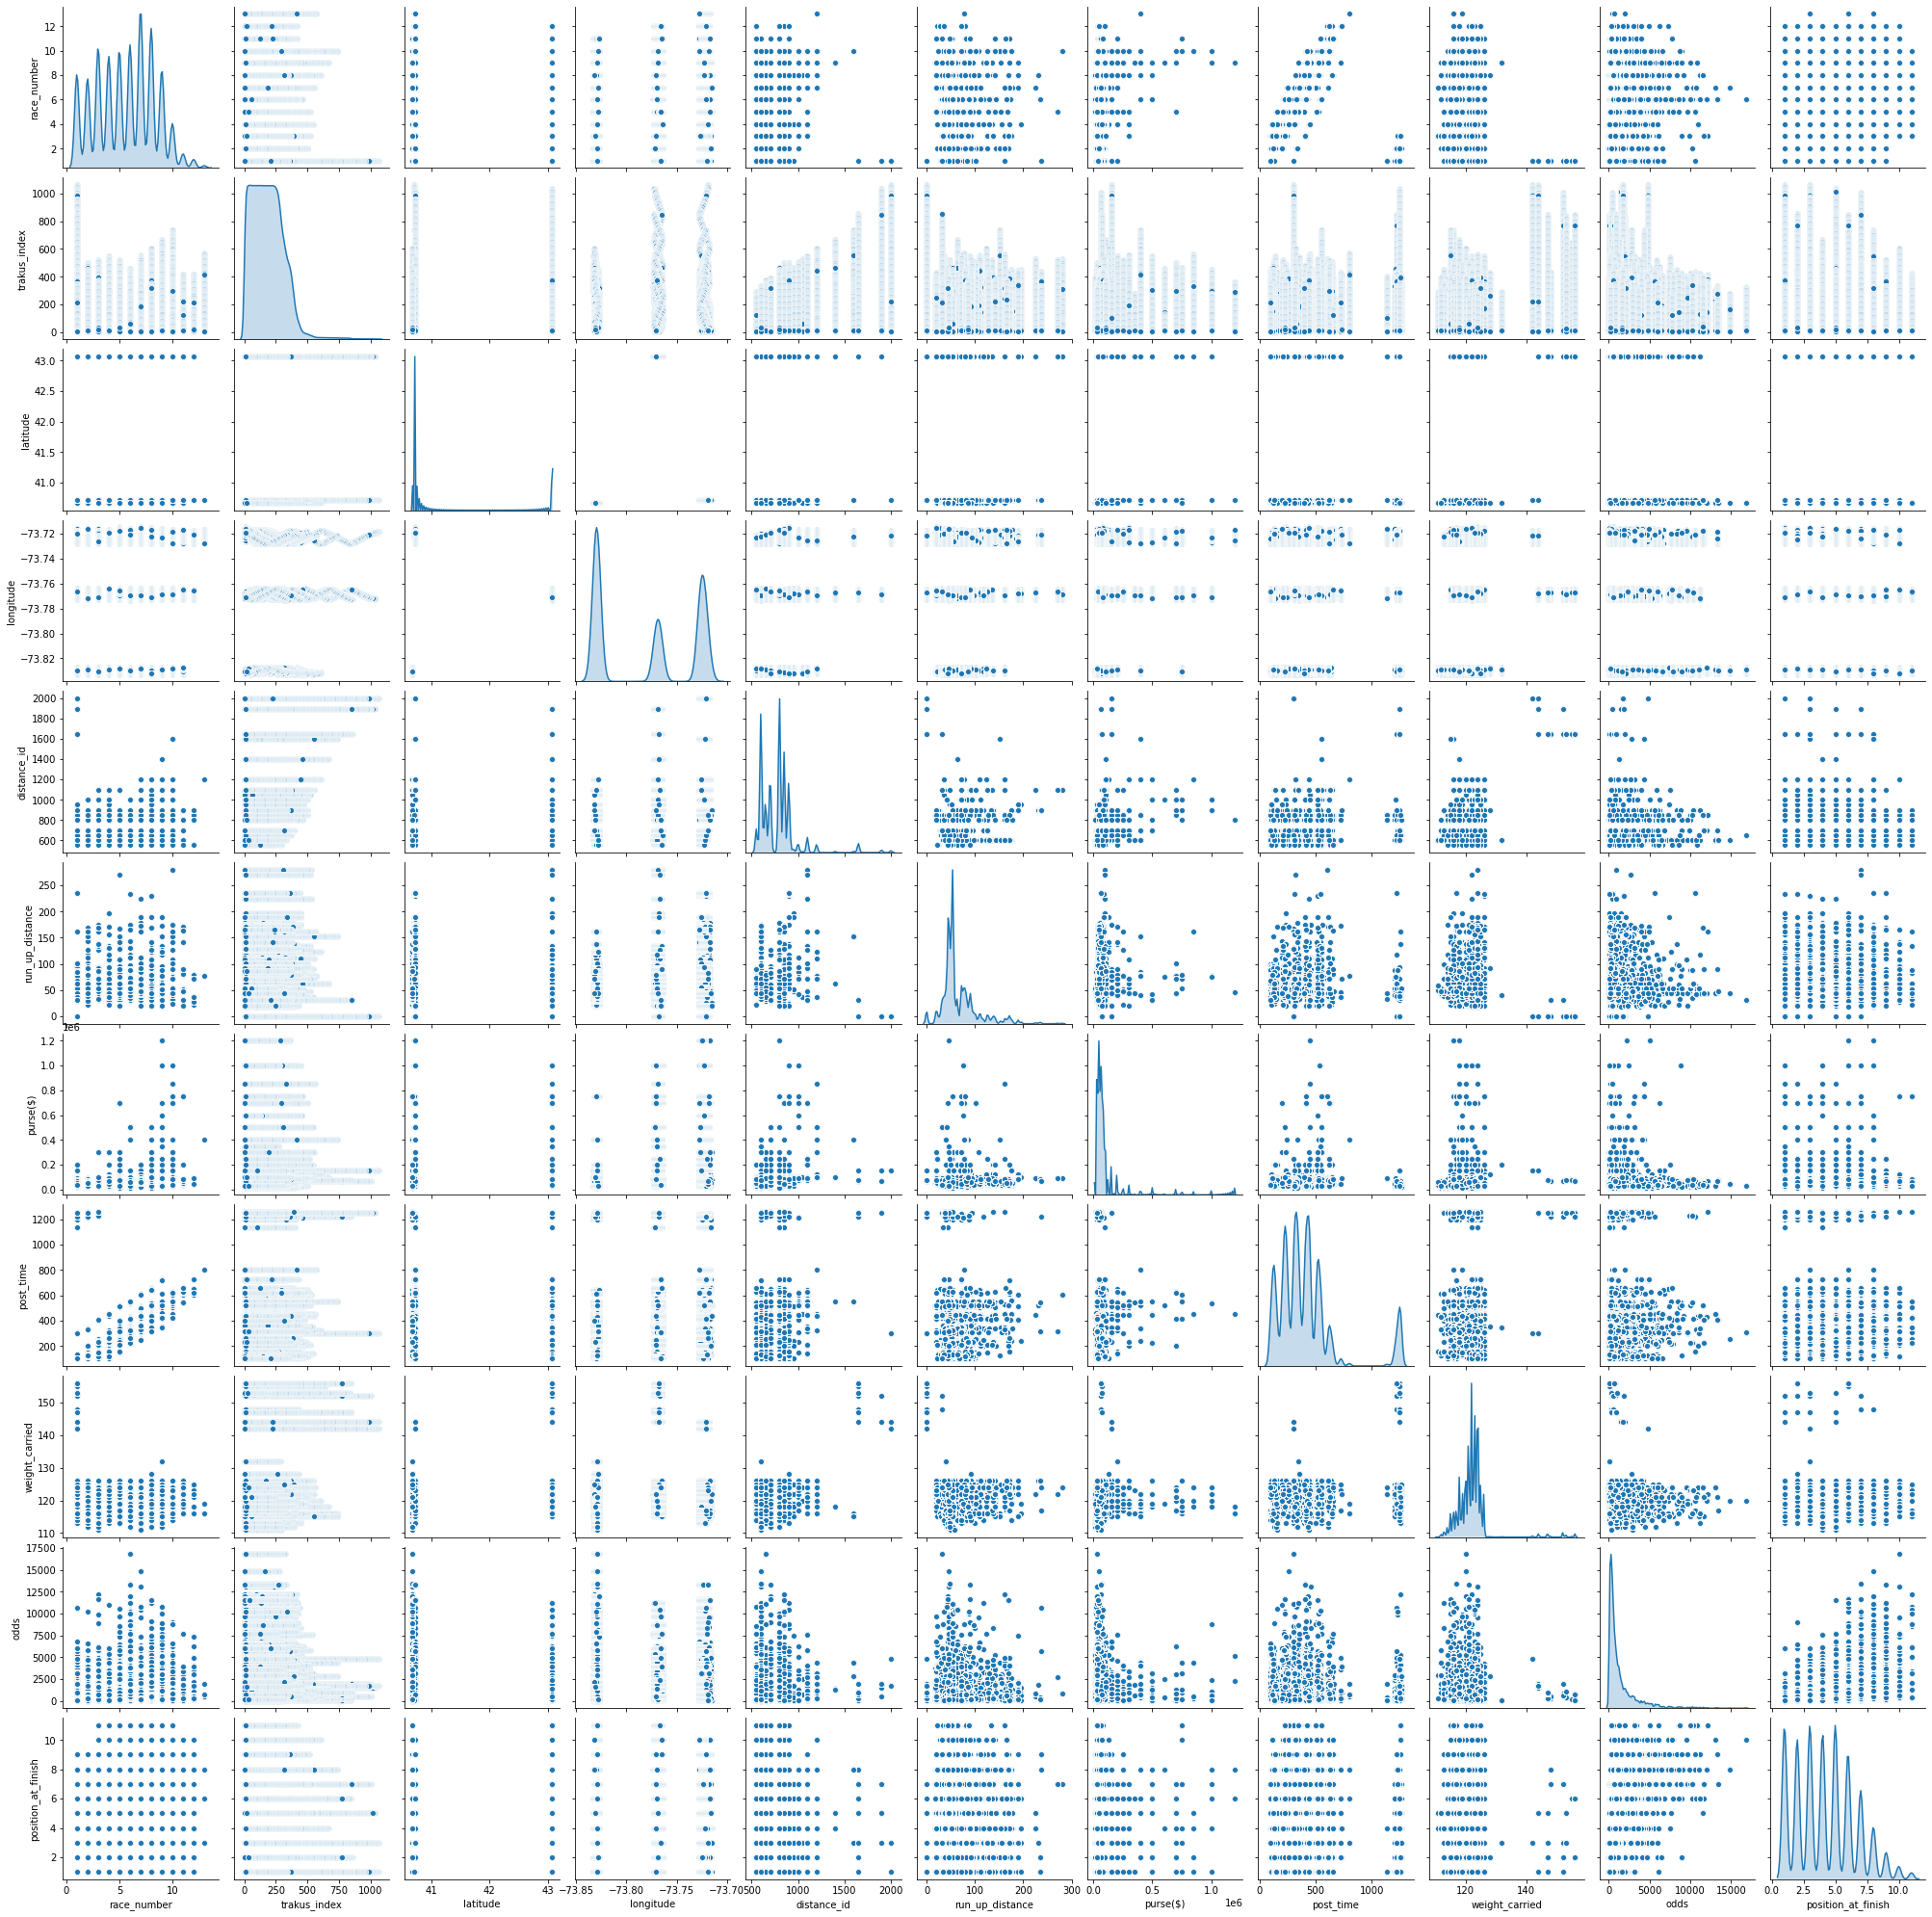

In [10]:
sns.pairplot(df2,diag_kind='kde')

    Viewing different features in form of boxplot. Getting a better understanding of the data and important features at hand

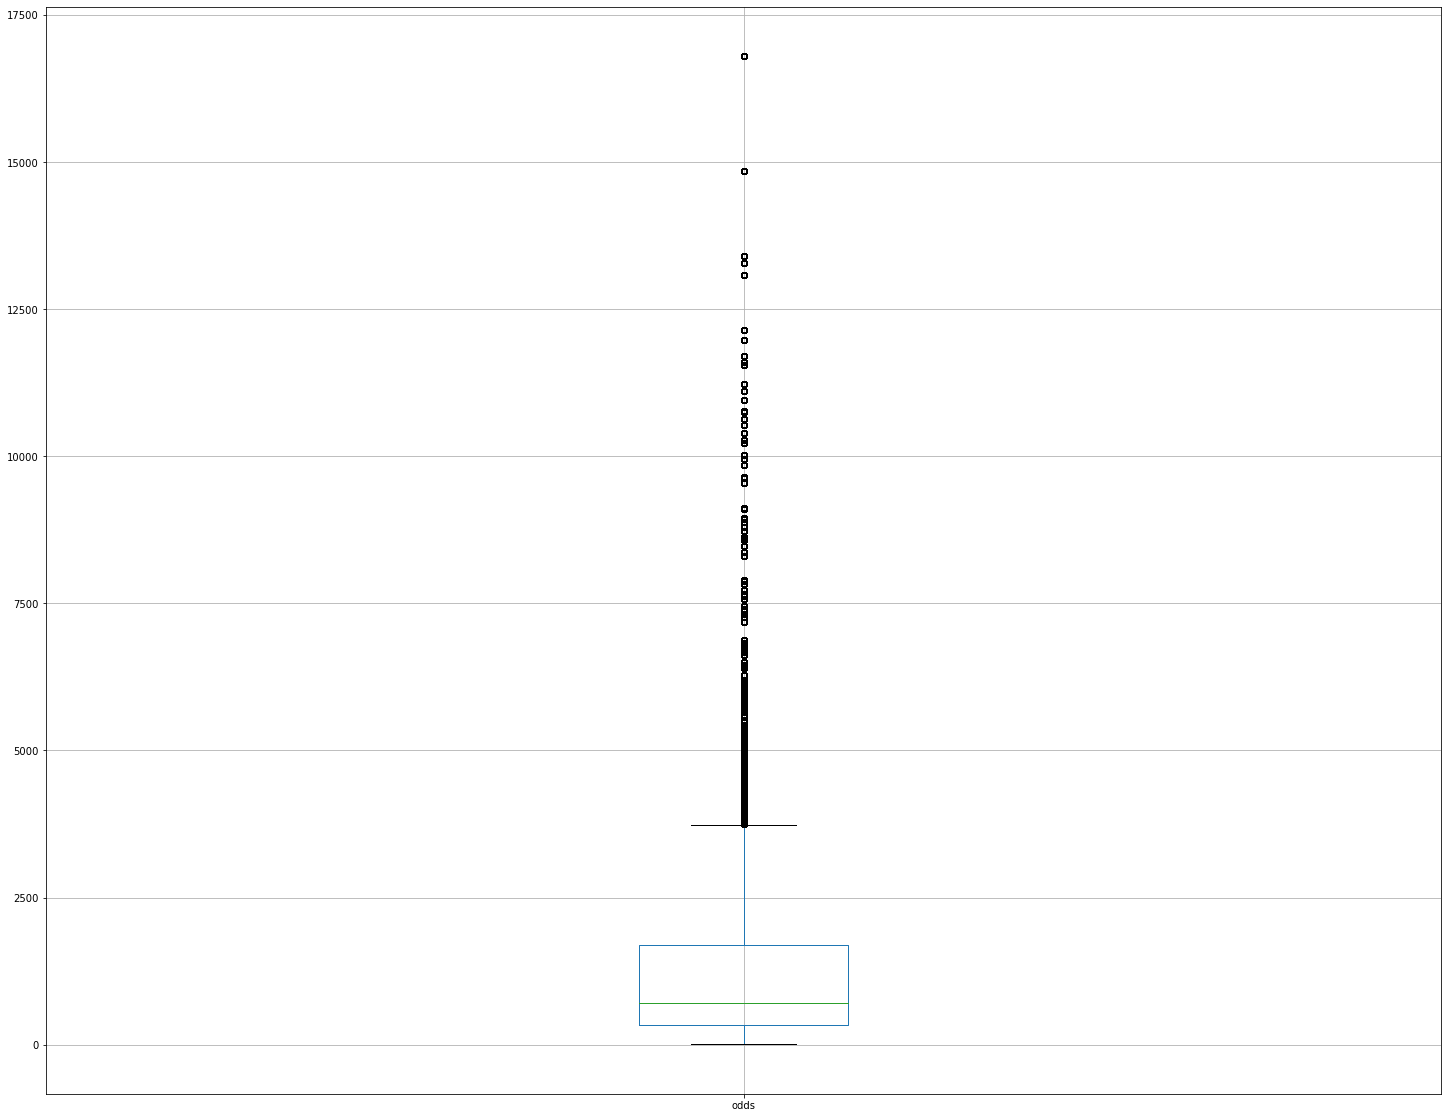

In [11]:
fig, ax = plt.subplots(figsize=(25,20))
df.boxplot('odds')

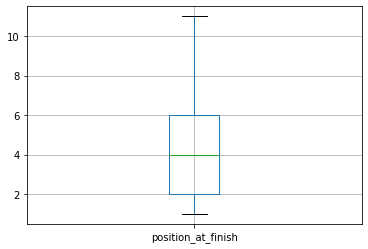

In [12]:
WC=df.boxplot('position_at_finish')

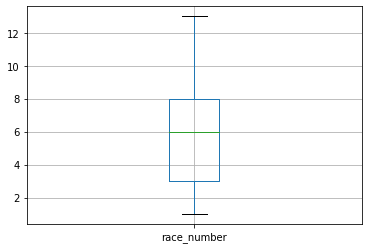

In [13]:
RC=df.boxplot('race_number')

    Removing outliers from plots

In [14]:
def remove_outliers(df,columns,n_std):
    for i in columns:
        
        mean = df[i].mean()
        std = df[i].std()
        
        df = df[(df[i] <= mean+(n_std*std))]
        
    return df
df_updated=remove_outliers(df,df[['odds']],4)
df_updated

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse($),post_time,weight_carried,jockey,odds,position_at_finish
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600.0,D,GD,48.0,CLM,25000.0,420.0,120.0,Andre Shivnarine Worrie,2090.0,8.0
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600.0,D,GD,48.0,CLM,25000.0,420.0,120.0,Andre Shivnarine Worrie,2090.0,8.0
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600.0,D,GD,48.0,CLM,25000.0,420.0,120.0,Andre Shivnarine Worrie,2090.0,8.0
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600.0,D,GD,48.0,CLM,25000.0,420.0,120.0,Andre Shivnarine Worrie,2090.0,8.0
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600.0,D,GD,48.0,CLM,25000.0,420.0,120.0,Andre Shivnarine Worrie,2090.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822332,AQU,2019-04-14,3,3,29,40.672359,-73.830879,800.0,T,GD,86.0,STK,100000.0,230.0,118.0,Junior Alvarado,1640.0,5.0
822333,AQU,2019-04-14,3,3,30,40.672316,-73.830897,800.0,T,GD,86.0,STK,100000.0,230.0,118.0,Junior Alvarado,1640.0,5.0
822334,AQU,2019-04-14,3,3,19,40.672766,-73.830692,800.0,T,GD,86.0,STK,100000.0,230.0,118.0,Junior Alvarado,1640.0,5.0
822335,AQU,2019-04-14,3,3,20,40.672728,-73.830710,800.0,T,GD,86.0,STK,100000.0,230.0,118.0,Junior Alvarado,1640.0,5.0


    Tried removing outliers in the 'odds' column that were 3 standard deviations from the mean. 
    Based on polynomial regression model the impact on the correlation was negative,
    although, the three error scores went down. When trying to remove outliers 4 standard deviations away,
    still had a negative impact and again the error scores went down. Overall the error scores
    only went down by a tenth or so, but saw the R-squared value go from about 0.27 down to 0.25.
    Which told me that these outliers were probably more significant to the overall data.

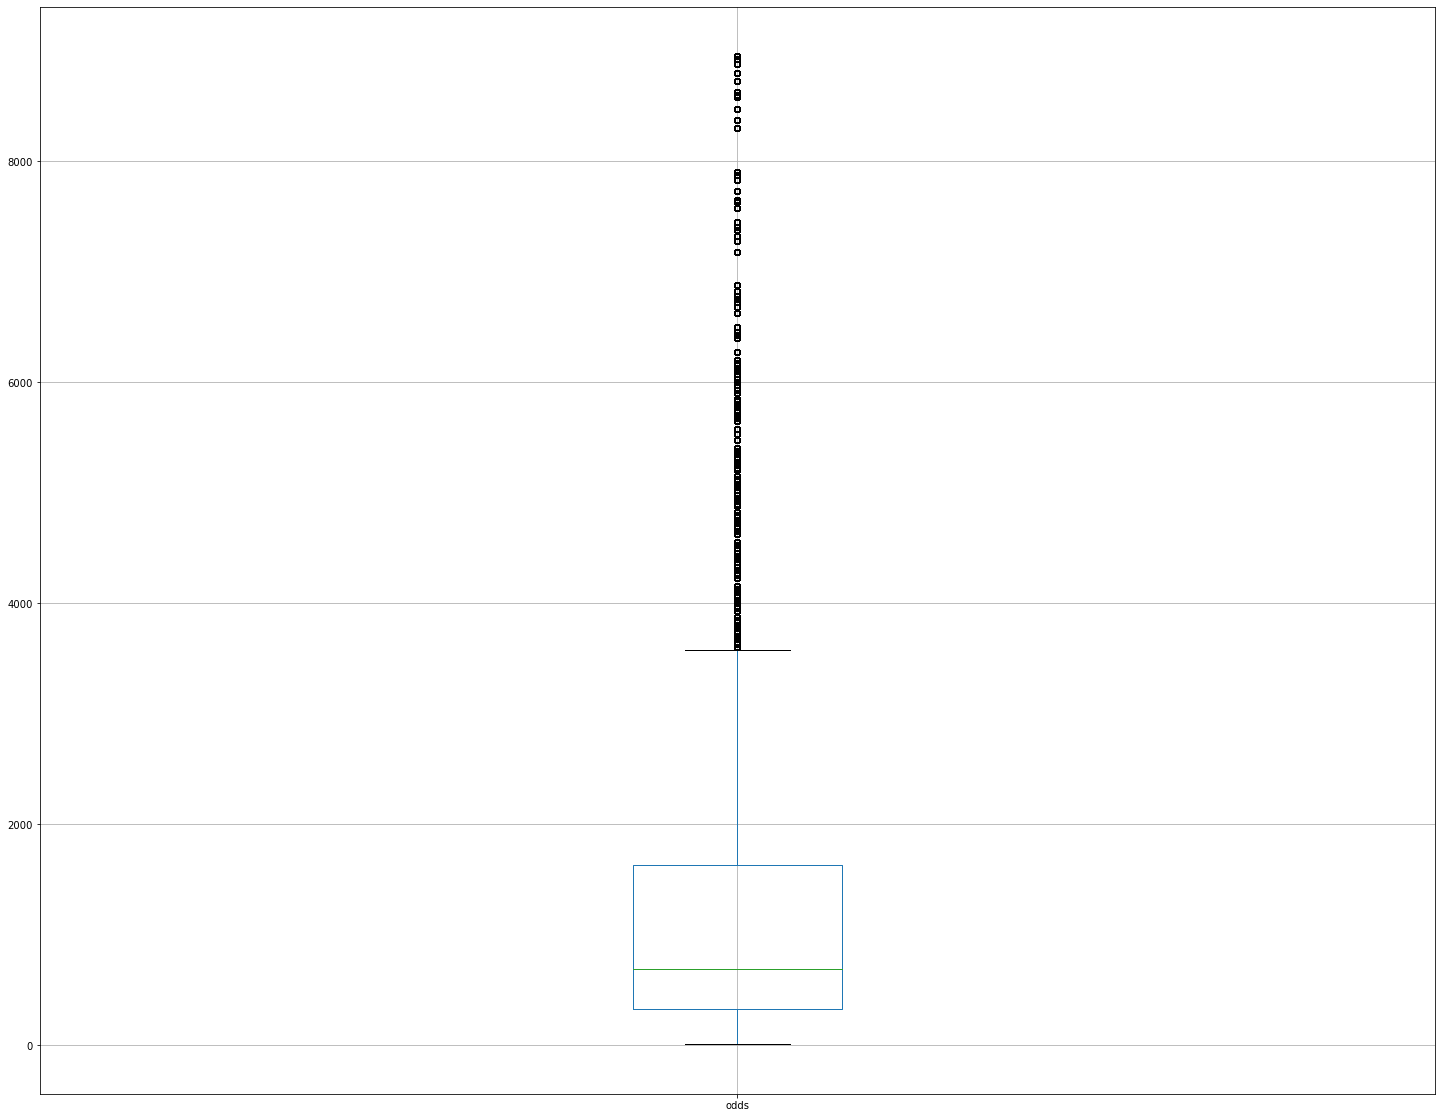

In [15]:
fig, ax = plt.subplots(figsize=(25,20))
df_updated.boxplot('odds')

    Creating matrix and heatmap of relationship between features

                    race_number  trakus_index  latitude  longitude  \
race_number            1.000000     -0.037671  0.013941   0.041513   
trakus_index          -0.037671      1.000000  0.080568   0.006101   
latitude               0.013941      0.080568  1.000000   0.134009   
longitude              0.041513      0.006101  0.134009   1.000000   
distance_id           -0.058074      0.401414  0.224129   0.108463   
run_up_distance        0.116865     -0.003307  0.004000   0.302853   
purse($)               0.325437      0.076030  0.110671   0.178840   
post_time              0.064718      0.122629  0.055244  -0.011096   
weight_carried        -0.238073      0.229241  0.272914   0.148218   
odds                   0.073038      0.000772 -0.005288  -0.045058   
position_at_finish     0.151819     -0.011400  0.035603  -0.028704   

                    distance_id  run_up_distance  purse($)  post_time  \
race_number           -0.058074         0.116865  0.325437   0.064718   
trakus_index 

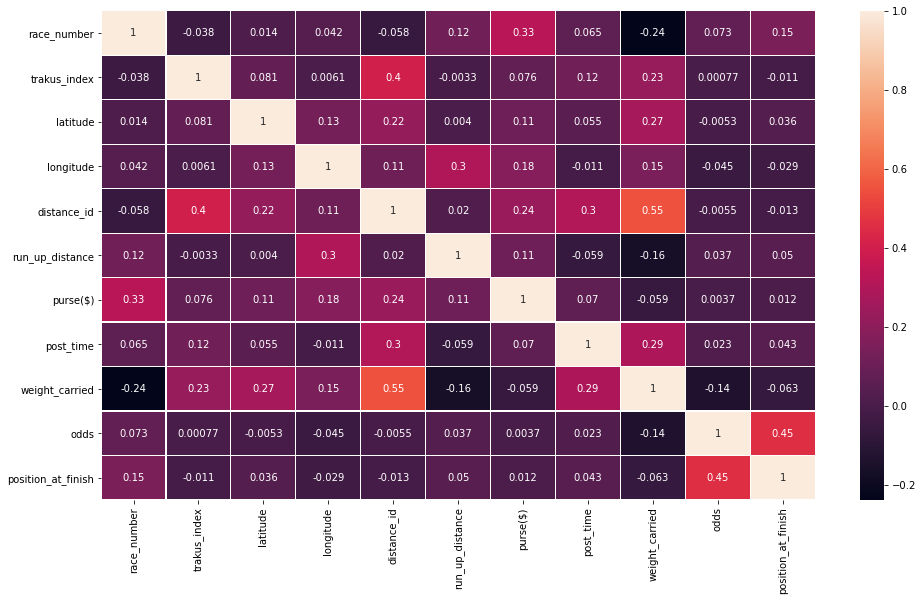

In [16]:
matrix= df.corr()
print(matrix)
fig, ax = plt.subplots(figsize=(16,9))
sns.heatmap(matrix,linewidths=0.1, annot=True)

    After removing all NA or null values and using the matrix and heatmap for this updated data. I was able to 
    figure out which feaatures/attriytbiues had teh strongest relationship/correlation with the 
    main feature I wanted to focus on, 'position_at_finish', will abbreviate to POF in some cases. 

    The heatmap and amtrix provide me with insight to the two features that had the strongest relationship with POF,
    these were  'odds' and 'race_number'. I tried to also visualize these two features to see the spread of
    data using a box plot, aftering viewing I found that odds had a larger amount of outliers,
    which I tried to remove some based on third or fourth standard deviaition. 
    
    Finding out that these outliers were actually crucial to the relationship and affected the correlation 
    too much to be removed. Which noted to me that it was not necessary to remove said outliers.
    As stated after the function 'remove_outliers'. 

    I am planning to compare differnt regression models to see what modelbest suits the data and will be using
    numerical models  to predict the number in relation to the position at finsih of each race. 

    I know I will face some difficultly in that, the relationship between all features are not as 
    strong as I would have liked,  hoping to improve the overall models and analysis to build a 
    stronger relationship and findings of R-squared value. 

    Creating training and test data for model. This allows for the models to use training data and 
    can be tested against the test data for proper analysis of the models.

In [17]:
x_train,x_test=train_test_split(df,train_size=0.80)
print(len(x_train),len(x_test))

657869 164468


    Creating linear models using ordinary least squares (ols). Starting off with a basic linear regression model for the two main features I found to be related to POF. Getting a better understanding on how this data works with each other
    and seeing how I can improve the models.

In [18]:
PAF_odds_model=smf.ols(formula='position_at_finish~odds',data=x_train).fit()
print(PAFmodel.summary())
PAF_racenum_model=smf.ols(formula='position_at_finish~race_number',data=x_train).fit()
print(PAF_racenum_model.summary())

NameError: name 'PAFmodel' is not defined

    Ploting ols models. Creating visuals to better interpet the data and seeing how the models fit the data.

In [ ]:
plot=sm.graphics.plot_fit(PAFmodel,1, vlines=False)
print(plot)
plot=sm.graphics.plot_fit(PAF_racenum_model,1, vlines=False)
print(plot)

    Can see that regression model slighltly fits data but could defintely be better.

    Creating multi-linear regression model using OLS and including and not including intercept. Now I want to see how the
    two features interact and predict POF. Using a multi-linear model to get a deeper understanding. I do want to start with 
    creating a model for the two features with no intercept/constant, to see how well the model fits the data. 

In [ ]:
y=(df["position_at_finish"])
x=(df[['odds']])

multi_lin_mod_no_intercept_odds=sm.OLS(y,x,data=x_train).fit()
print(multi_lin_mod_no_intercept_odds.summary())

In [ ]:
y=(df["position_at_finish"])
x=(df[['odds','race_number']])

multi_lin_mod_no_intercept=sm.OLS(y,x,data=x_train).fit()
print(multi_lin_mod_no_intercept.summary())


    Can see that removing the intercept and including features: odds, race_number, and "weight_carried; creates a model that
    has a high R2 value and adjusted R2 value. However, since remocing the intercept creates a higher correlation it works 
    well with the specific data at hand but can vary greatly when need data is added and is only a good correlation
    when predicting. 

In [ ]:
y=(df["position_at_finish"])
x=(df[['race_number','odds']])
x=sm.add_constant(x)
multi_lin_mod_intercept=sm.OLS(y,x,data=x_train).fit()
pred=multi_lin_mod_intercept.predict()
print(multi_lin_mod_intercept.summary())
print(pred)

    Can see that adding the intercept and including features: odds, race_number, and "weight_carried; 
    creates a weaker correlation and lower R2 value and Adj. R2 value. Adding the intercept/constant back allows for better prediction and insight into new data that is added and model will be less impacted when new data is added.

    Creating another ols model using the two strongest correlated features. Checking that both tools, smf.ols and sm.OLS,
    create the same results for the model. Checking to make sure I did not make an errors or mistakes 

In [ ]:
model_twofeats  = smf.ols(formula='position_at_finish~ odds + race_number', data=x_train).fit()
print(model23.summary())

    Plotting the two models and viewing each feature against position at finish. Using basic plots to visualize the multi-linear models with and without intercepts to see how well each fits the data. Knowing that the no intercept produces
    a better R-squared value, but being 'uncentered'. I wanted to have a better understanding and using these visuals helps solve this.

In [ ]:
plot1=sm.graphics.plot_fit(multi_lin_mod_no_intercept,0, vlines=False)
plot2=sm.graphics.plot_fit(multi_lin_mod_no_intercept,1, vlines=False)

plot3=sm.graphics.plot_fit(multi_lin_mod_intercept,0, vlines=False)
plot4=sm.graphics.plot_fit(multi_lin_mod_intercept,1, vlines=False)
plot5=sm.graphics.plot_fit(multi_lin_mod_intercept,2, vlines=False)

    Create a fun little function called PositionFinishPrediction that uses a linear regression model and predicts position
    at finish based on race number and odds. Asks for two inputs: race number and odds. Once inputed prints out 
    predicted position at finish.

In [ ]:
def PositionFinishPrediction(a,b):
    
    x = df[['race_number','odds']]
    y = df["position_at_finish"]

    Linear_Model = linear_model.LinearRegression()
    Linear_Model.fit(x, y)
    predictedPAF = int(Linear_Model.predict([[a,b]]))
    print('Predicted Position at Finish:',predictedPAF)

In [ ]:
PositionFinishPrediction(1,2060)
PositionFinishPrediction(1,1440)
PositionFinishPrediction(2,1000)
PositionFinishPrediction(2,5060)
PositionFinishPrediction(3,1333)
PositionFinishPrediction(3,234)
PositionFinishPrediction(7,1400)
PositionFinishPrediction(7,2045)
PositionFinishPrediction(9,1)
PositionFinishPrediction(9,10000)

        Spliting data into x_train and x_test to dive deeper to see which features predict position at finish the best and
        how many features is ideal

In [ ]:
x_train,x_test=train_test_split(df,train_size=0.80)
print(len(x_train),len(x_test))

        Now using forward stepwise refinement, to gurantee that I am using the best two features to predict POF. 
        By using this method I can add each feature one step at a time. Using the resulting model,
        I can compare the results of each model R-squared value to improve my understanding of the features and the data.

In [ ]:
model1 = ['',0]

for p in df[['race_number','trakus_index','latitude','distance_id','run_up_distance','post_time','weight_carried','odds']]:
    model  = smf.ols(formula='position_at_finish~'+ p, data=x_train).fit()
    print(p, model.rsquared)
    if model.rsquared>model1[1]:
        model1 = [p, model.rsquared]
print('best:',model1)

for p in df[['race_number','trakus_index','latitude','distance_id','run_up_distance','post_time','weight_carried','odds']]:
    model  = smf.ols(formula='position_at_finish~'+ p, data=x_test).fit()
    print(p, model.rsquared)
    if model.rsquared>model1[1]:
        model1 = [p, model.rsquared]
print('best:',model1)

model2 = ['',0]

for p in df[['race_number','trakus_index','latitude','distance_id','run_up_distance','post_time','weight_carried','odds']]:
    model  = smf.ols(formula='position_at_finish~'+ 'odds' + '+' + p, data=x_train).fit()
    print(p, model.rsquared)
    if model.rsquared>model2[1]:
        model2 = [p, model.rsquared]
print('best:',model2)

for p in df[['race_number','trakus_index','latitude','distance_id','run_up_distance','post_time','weight_carried','odds']]:
    model  = smf.ols(formula='position_at_finish~'+ 'odds' + '+' + p, data=x_test).fit()
    print(p, model.rsquared)
    if model.rsquared>model2[1]:
        model2 = [p, model.rsquared]
print('best:',model2)

model3 = ['',0]

for p in df[['race_number','trakus_index','latitude','distance_id','run_up_distance','post_time','weight_carried','odds']]:
    model  = smf.ols(formula='position_at_finish~'+ 'odds' + '+' + 'race_number' + '+' + p, data=x_train).fit()
    print(p, model.rsquared)
    if model.rsquared>model3[1]:
        model3 = [p, model.rsquared]
print('best:',model3)

for p in df[['race_number','trakus_index','latitude','distance_id','run_up_distance','post_time','weight_carried','odds']]:
    model  = smf.ols(formula='position_at_finish~'+ 'odds' + '+' + 'race_number' + '+' + p, data=x_test).fit()
    print(p, model.rsquared)
    if model.rsquared>model3[1]:
        model3 = [p, model.rsquared]
print('best:',model3)

model4 = ['',0]

for p in df[['race_number','trakus_index','latitude','distance_id','run_up_distance','post_time','weight_carried','odds']]:
    model  = smf.ols(formula='position_at_finish~'+ 'odds' + '+' + 'race_number' + '+' + 'latitude' + '+' 
                     + p, data=x_train).fit()
    print(p, model.rsquared)
    if model.rsquared>model4[1]:
        model4 = [p, model.rsquared]
print('best:',model4)

for p in df[['race_number','trakus_index','latitude','distance_id','run_up_distance','post_time','weight_carried','odds']]:
    model  = smf.ols(formula='position_at_finish~'+ 'odds' + '+' + 'race_number' + '+' + 'latitude' + '+' 
                     + p, data=x_test).fit()
    print(p, model.rsquared)
    if model.rsquared>model4[1]:
        model4 = [p, model.rsquared]
print('best:',model4)

model5 = ['',0]

for p in df[['race_number','trakus_index','latitude','distance_id','run_up_distance','post_time','weight_carried','odds']]:
    model  = smf.ols(formula='position_at_finish~'+ 'odds' + '+' + 'race_number' + '+' + 'latitude' + '+' + 'post_time' + '+' 
                     + p, data=x_train).fit()
    print(p, model.rsquared)
    if model.rsquared>model5[1]:
        model5 = [p, model.rsquared]
print('best:',model5)

for p in df[['race_number','trakus_index','latitude','distance_id','run_up_distance','post_time','weight_carried','odds']]:
    model  = smf.ols(formula='position_at_finish~'+ 'odds' + '+' + 'race_number' + '+' + 'latitude' + '+' + 'post_time' + '+'
                     + p, data=x_test).fit()
    print(p, model.rsquared)
    if model.rsquared>model5[1]:
        model5 = [p, model.rsquared]
print('best:',model5)

model6 = ['',0]

for p in df[['race_number','trakus_index','latitude','distance_id','run_up_distance','post_time','weight_carried','odds']]:
    model  = smf.ols(formula='position_at_finish~'+ 'odds' + '+' + 'race_number' + '+' + 'latitude' + '+' + 'post_time' + 
                     '+' 'run_up_distance' + '+' + p, data=x_train).fit()
    print(p, model.rsquared)
    if model.rsquared>model6[1]:
        model6 = [p, model.rsquared]
print('best:',model6)

for p in df[['race_number','trakus_index','latitude','distance_id','run_up_distance','post_time','weight_carried','odds']]:
    model  = smf.ols(formula='position_at_finish~'+ 'odds' + '+' + 'race_number' + '+' + 'latitude' + '+' + 'post_time' +
                     '+''run_up_distance' + '+' + p, data=x_test).fit()
    print(p, model.rsquared)
    if model.rsquared>model6[1]:
        model6 = [p, model.rsquared]
print('best:',model6)

model7 = ['',0]

for p in df[['race_number','trakus_index','latitude','distance_id','run_up_distance','post_time','weight_carried','odds']]:
    model  = smf.ols(formula='position_at_finish~'+ 'odds' + '+' + 'race_number' + '+' + 'latitude' + '+' + 'post_time' + '+'
                     + 'run_up_distance' + '+' + 'distance_id' + '+' + p, data=x_train).fit()
    print(p, model.rsquared)
    if model.rsquared>model7[1]:
        model7 = [p, model.rsquared]
print('best:',model7)

for p in df[['race_number','trakus_index','latitude','distance_id','run_up_distance','post_time','weight_carried','odds']]:
    model  = smf.ols(formula='position_at_finish~'+ 'odds' + '+' + 'race_number' + '+' + 'latitude' + '+' + 'post_time' + '+'
                     + 'run_up_distance' + '+' + 'distance_id' + '+' + p, data=x_test).fit()
    print(p, model.rsquared)
    if model.rsquared>model7[1]:
        model7 = [p, model.rsquared]
print('best:',model7)

model8 = ['',0]

for p in df[['race_number','trakus_index','latitude','distance_id','run_up_distance','post_time','weight_carried','odds']]:
    model  = smf.ols(formula='position_at_finish~'+ 'odds' + '+' + 'race_number' + '+' + 'latitude' + '+' + 'post_time' + '+'
                     + 'run_up_distance' + '+' + 'distance_id' + '+' + 'weight_carried' + '+' + p, data=x_train).fit()
    print(p, model.rsquared)
    if model.rsquared>model8[1]:
        model8 = [p, model.rsquared]
print('best:',model8)

for p in df[['race_number','trakus_index','latitude','distance_id','run_up_distance','post_time','weight_carried','odds']]:
    model  = smf.ols(formula='position_at_finish~'+ 'odds' + '+' + 'race_number' + '+' + 'latitude' + '+' + 'post_time' + '+'
                     + 'distance_id' + '+' + 'run_up_distance' + '+' + 'weight_carried' + '+' + p, data=x_test).fit()
    print(p, model.rsquared)
    if model.rsquared>model8[1]:
        model8 = [p, model.rsquared]
print('best:',model8)

    Plotting number of predictors against R-squared value. Using this visual to figure out at what point does too many 
    features impact the resulting R-squared value to make it worth keeping in the model. How many features is necessary 
    to gain the best resulting correlation and strongest relationship.

In [ ]:
predictors = [1,2,3,4,5,6,7,8]
adjr2_train = [0.2067019172674034,0.22085403780420354,0.22215442200916258,0.22270767972352734,
               0.22316118161474519,0.2235867173452868,0.2243045685167393,0.2243376909635968]
plot=plt.plot(predictors,adjr2_train)
plot=plt.scatter(predictors,adjr2_train)
adjr2_test = [0.2050146199204128,0.2191632517485893,0.22055180310493439,0.22105992179122258,
              0.22153945407824516,0.2220312923106913,0.2227081886271609,0.22276010032918858]
plot=plt.scatter(predictors,adjr2_test, color="red")
plot=plt.plot(predictors,adjr2_test, color="red")
plt.xlabel('Number of Predictors')
plt.ylabel('Adjusted R^2')
plt.title('Comparing Predictors Against R^2')
plt.legend(['Train','Test'])

    Creating polynomial regression models. Now I want to create another model to compare to the linear and 
    multi-linear regression models. Using a polynomial regression model, I can compare what degree is best for 
    individual features and for multiple features. Ideally want to compare the models to see what produices
    the strongest relationship greatest R-squared value. But also maintains a low error score. 
    Planning to implement RMSE, MSE, and MAE to confirm error scores of each main model.

In [ ]:
y=np.asanyarray(df["position_at_finish"])
x=np.asanyarray(df[['odds']])
poly = PolynomialFeatures(degree=1)
poly_features = poly.fit_transform(x.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)
y_pred=poly_reg_model.predict(poly_features)

    Plotting polynomial regression model. Using a scatter plot to plot the features used and compare it to the 
    polynomial model created. Gaining insight to how useful this model may be.

In [ ]:
plt.figure
plt.scatter(x,y)
plt.plot(x,y_pred,color="r")

    Creating a polynomial regression and linear regression model to see which creates the best R-squared value and keeps
    RMSE, MSE, MAE scores the lowest. Also figuring out what degree is best for polynomial regression model.

In [ ]:
y=np.asanyarray(df["position_at_finish"])
x=np.asanyarray(df[['odds','race_number']])
poly = PolynomialFeatures(degree=4)
poly_features = poly.fit_transform(x)
X_train,X_test,y_train,y_test=train_test_split(poly_features,y,test_size=0.3,random_state=2)
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
poly_reg_y_predicted = poly_reg_model.predict(X_test)

poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
poly_reg_mse = mean_squared_error(y_test,poly_reg_y_predicted)
poly_reg_mae = mean_absolute_error(y_test,poly_reg_y_predicted)
poly_reg_r2 = r2_score(y_test,poly_reg_y_predicted)
print('R2:',poly_reg_r2,'\nRMSE:',poly_reg_rmse, '\nMSE:',poly_reg_mse, '\nMAE:', poly_reg_mae, '\nBest Degree:', 4)

    Comparing RMSE, MSE, and MAE values, the difference is not significant but we can see that through the use of the 
    polynomial regression model to the 6th degree, created the smallest value for all measurements compared to other degrees
    and the linear regression model.

In [ ]:
y=np.asanyarray(df["position_at_finish"])
x=np.asanyarray(df[['odds','race_number']])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
lin_reg_y_predicted = lin_reg_model.predict(X_test)
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, lin_reg_y_predicted))
lin_reg_mse=mean_squared_error(y_test, lin_reg_y_predicted)
lin_reg_mae = mean_absolute_error(y_test,lin_reg_y_predicted)
lin_reg_r2= r2_score(y_test, lin_reg_y_predicted)
print('R2:',lin_reg_r2,'\nRMSE:',lin_reg_rmse, '\nMSE:',lin_reg_mse, '\nMAE:', lin_reg_mae)


    Comparing RMSE, MSE, and MAE values, the difference is notiecable enough that the linear regression model for these 
    three features in regards to predicting position at finish, was worse overall. R2 was lower and all the error measures 
    were higher than both varitions of polynomial regression with varying degrees.

    This was a fun task after finishing the rest of the notebook. 
    
    Original work was completed by MATT OP, Big Data Derby 2022 EDA. 
    
    Citing URL: https://www.kaggle.com/code/mattop/big-data-derby-2022-eda
    
    I used parts of his code and played around with the concepts and made some very inreseting and cool looking visuals.
    Highlighting the tracks raced on and location of race track based on longitude and latitude

In [ ]:
for i in ['AQU','BEL','SAR']:
    
    track = df[df["track_id"] == i]
    plt.style.use("Solarize_Light2")
    plt.figure(figsize = (16,8))
    sns.scatterplot(data = track, x = "longitude", y = "latitude", hue = "race_number", palette='Paired')

    plt.title('Race Track Highlighted using Longitude and Latitude',color="b")
    plt.show()

    Conclusion:
    
    Based on numerous regression models we can see that if the desire to predict or estimate the position at
    finish of a race, it is crucial to maintain two features: race number and odds. These two features had the strongest 
    correlation from the start based on the heatmap and matrix. 
    
    Fine tuning the data and analysis, I was able to compated and contrast using linear/multi-linear regression models
    with polynomial regression models. Further anaylsis through forward stepwise refinement, 
    I was able to confirm that odds and race number were the two main features to be add tothe predictive model
    for the data.In addition, through plotting the forward stepwise refinement models, 
    plotting R-squared values against number of features/predictors, 
    it was clear that two features will maintain close to the strongest correaltion between the features without the risk of 
    overfitting or using two many features, that could have colinearity or the like. 
    
    Through the compare and contrast of the regression models, I can see that the polynomial model provided a 
    better predictive model. The polynomial model outputted a stronger and higher R-squared value, 
    but to back this conclusion, the RMSE, MSE, and MAE scores were found and proved that the polynomial regression model 
    resulted in a lower error score based on all three formulas. Finding that with using the polynomial regression model, 
    the best degree to use with the two main features to predict POF, was that it did its best with a degree of 4. 
    This proved to provide the strongest R-squared value and again the lowest error score for all three tests. 
    
    However, from the start and even after building a stronger predictive model, the R-squared value proved to be smaller
    and only coming out to be closer to 0.30s. This still does not gurantee a very strong relationship among the features 
    odds and race number with the poisiton at finish. But based on the data provide and proper analysis and dedcution, 
    it seems to have provided the best relationship I could have created and outputted based on the knowledege I had on this 
    data and from my ecucation. 
    
    I assume there are many tasks that could be performed to continually improve the performance of the models
    I mentioned above. Although, my goal was to get a better understanding of this data and help propvide more insight into
    the predcitve nature in teh realm of derby horse racing. Now have the knowlesdge of what attributes in relation to the 
    derby has some impact on the overall results of the race, and can continue to work on these models to ideally create
    a even stronger model to predict overall standings of each race for each competitor/animal/jockey.
   